In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]
headers = {'Content-Type': 'application/json'}

In [3]:
### Financial Statements

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.set_index(['symbol', 'date'], inplace=True)
        
        return df
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Earnings Surprises
def get_earnings_surprises(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company earning-surprises
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/earnings-surprises/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    df['earningSurprise'] =  ((df['actualEarningResult'] - df['estimatedEarning']) / abs(df['estimatedEarning'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

### Stock Screener
- marketCapMoreThan & marketCapLowerThan : Number
- priceMoreThan & priceLowerThan : Number
- betaMoreThan & betaLowerThan : Number
- volumeMoreThan & volumeLowerThan : Number
- dividendMoreThan & dividendLowerThan : Number
- isEtf & isActivelyTrading : true/false
- sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
- Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages - Non-Alcoholic
- Country : US - UK - MX - BR - RU - HK - CA - ...
- exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
- limit : Number

Large Cap >= 10B

2B =< Mid Cap < 10B

0.3B < Small Cap < 2B

In [4]:
profile = get_profile('NWSA').iloc[[0,4,9,14,15,19,20,17]]
profile

,0
symbol,NWSA
mktCap,15357834240
currency,USD
exchangeShortName,NASDAQ
industry,Broadcasting
sector,Communication Services
country,US
description,"News Corporation, a media and information serv..."


In [5]:
profile.loc['mktCap']/1.0e9

0    15.357834
Name: mktCap, dtype: object

In [6]:
large_cap = 10000000000
mid_cap = 2000000000
small_cap = 300000000

params = {'sector': 'Industrials',
          'industry': 'Specialty Industrial Machinery',
          'country': 'US',
          #'exchange': 'NASDAQ',
          'isEtf': False,
          'marketCapLowerThan': large_cap,
          'marketCapMoreThan': mid_cap,
          'volumeMoreThan': 100000,
          'limit': 300}

def get_stock_screener(params):
    response = requests.get("https://financialmodelingprep.com/api/v3/stock-screener?" 
                            + 'marketCapLowerThan=' + str(params['marketCapLowerThan'])
                            + '&marketCapMoreThan=' + str(params['marketCapMoreThan'])
                            + '&volumeMoreThan=' + str(params['volumeMoreThan'])
                            + '&sector=' + str(params['sector'])
                            + '&industry=' + str(params['industry'])
                            + '&country=' + str(params['country'])
                            #+ '&exchange=' + str(params['exchange'])
                            + '&isEtf=' + str(params['isEtf'])
                            + '&limit=' + str(params['limit'])
                            + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df.set_index(['symbol'], inplace=True)
    
    return df

### Initial screening by sector and market cap

In [7]:
screened_tickers = get_stock_screener(params)
tickers = screened_tickers.index.to_list()
print(tickers[:])
print('\n')
print("number of screened tickers =", len(tickers))

['MIDD', 'ITT', 'DCI', 'CFX', 'RBC', 'RXN', 'CR', 'GTLS', 'FLS', 'CW', 'GTES', 'JBT', 'PSN', 'WTS', 'AIMC', 'HI', 'FELE', 'ATKR', 'ARNC', 'FLOW', 'SPXC', 'B', 'MWA', 'HLIO', 'WBT']


number of screened tickers = 25


### Industries

In [8]:
# find industries of the screened stock tickers
def get_industries_from_profiles(tickers):
    
    temp = []

    for ticker in tickers:
        df_industry = get_profile(ticker).loc[['symbol', 'industry']]
        temp.append(df_industry)
    
    df = pd.concat(temp, axis=1)
    df = df.transpose()
    df.columns = ['symbol', 'industry']
    df.reset_index(drop=True, inplace=True)
    
    return df

In [9]:
df_industry = get_industries_from_profiles(tickers)
df_industry['industry'].value_counts()

Specialty Industrial Machinery    25
Name: industry, dtype: int64

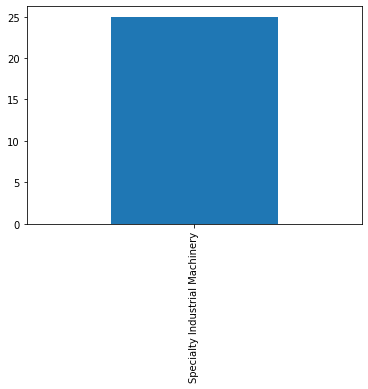

In [10]:
df_industry['industry'].value_counts().plot.bar();

### Key Metrics

In [11]:
def get_key_metrics_tickers(tickers, period):
    """
    Input: a list of stock tickers and period ('FY', or 'quarter')
    Output: pandas dataframe for selected key metrics
    """ 
    metrics = [
        'peRatio',
        'enterpriseValueOverEBITDA',
        'evToSales',
        'freeCashFlowYield',
        'debtToEquity',
        'roic',
        'roe',
        'salesGeneralAndAdministrativeToRevenue',
        'researchAndDdevelopementToRevenue'
    ]
    
    dataframes = []
    
    for ticker in (tickers):
        df = get_key_metrics(ticker, period)
        dataframes.append(df)
    df = pd.concat(dataframes)
    df['peRatio'] = pd.to_numeric(df['peRatio'])
    df['enterpriseValueOverEBITDA'] = pd.to_numeric(df['enterpriseValueOverEBITDA'])
    df['evToSales'] = pd.to_numeric(df['evToSales'])
    df['freeCashFlowYield'] = pd.to_numeric(df['freeCashFlowYield'])
    df['debtToEquity'] = pd.to_numeric(df['debtToEquity'])
    df['roic'] = pd.to_numeric(df['roic'])
    df['roe'] = pd.to_numeric(df['roe'])
    df['salesGeneralAndAdministrativeToRevenue'] = pd.to_numeric(df['salesGeneralAndAdministrativeToRevenue'])
    df['researchAndDdevelopementToRevenue'] = pd.to_numeric(df['researchAndDdevelopementToRevenue'])
    df_metrics = df[metrics]
    df_metrics = df_metrics.rename(columns={'enterpriseValueOverEBITDA': 'EV/EBITDA', 
                       'salesGeneralAndAdministrativeToRevenue': 'SG&A/revenue', 
                       'researchAndDdevelopementToRevenue': 'R&D/revenue' })
    
    return df_metrics


def make_comparison_plot(df_0, ticker_a, ticker_b, metrics):
    
    df_a = df_0.loc[ticker_a][metrics][:20].sort_index()
    df_b = df_0.loc[ticker_b][metrics][:20].sort_index()
    df = pd.concat([df_a, df_b], axis=1)
    df.columns = [metrics + '_' + ticker_a, metrics + '_' + ticker_b]
    ax = df.plot.bar(figsize=(10,7), grid=True)
    ax.set_xlabel('')
    ax.set_ylabel(metrics, fontsize=14)
    plt.tight_layout()
    
    return ax   

### Tickers selection
get quarterly key metrics for given sector and market cap

In [12]:
df_metrics_quarter = get_key_metrics_tickers(tickers, 'quarter')
#df_metrics_quarter.head(2)

In [13]:
tickers_selected = df_metrics_quarter.index.get_level_values(0).unique().to_list()
print("number of selected tickers =", len(tickers_selected))

number of selected tickers = 25


In [14]:
df_last4q = df_metrics_quarter.groupby('symbol').head(4)
pe_25 = df_last4q['peRatio'].groupby('symbol').min().describe()['25%']
pe_75 = df_last4q['peRatio'].groupby('symbol').max().describe()['75%']
print("pe_25=", pe_25)
print("pe_75=", pe_75)

pe_25= -16.40983068971724
pe_75= 51.22826190838845


In [15]:
df_last4q[['peRatio']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
peRatio,100.0,13.602686,160.128441,-1279.985024,11.352506,21.175394,29.638317,885.470299


<AxesSubplot:>

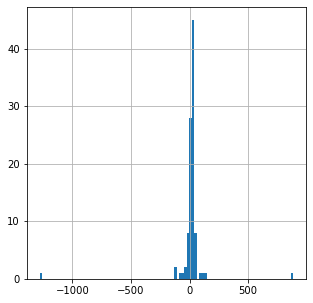

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
df_last4q['peRatio'].hist(bins=100)
#ax.set_xlim(-3000, 10000)

In [17]:
df_last4q[df_last4q['peRatio'] > pe_75].index.get_level_values(0).nunique()

6

In [18]:
tickers_ignored = set(df_last4q[(df_last4q['peRatio'] <= pe_25) | (df_last4q['peRatio'] >= pe_75)].index.get_level_values(0).unique())
all_tickers = set(df_metrics_quarter.index.get_level_values(0).unique())
tickers_selected = list(all_tickers - tickers_ignored)
print(tickers_selected)
print('\n')
print("number of selected tickers =", len(tickers_selected))

['RXN', 'JBT', 'MIDD', 'CW', 'MWA', 'ATKR', 'WBT', 'GTLS', 'WTS', 'SPXC', 'DCI', 'RBC', 'AIMC']


number of selected tickers = 13


In [19]:
'RMD' in tickers_selected

False

In [20]:
# Selected tickers' statistic
quarterly_stat = df_metrics_quarter.loc[tickers_selected].describe().transpose()
quarterly_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,1020.0,14.350596,72.201812,-1285.044124,10.509752,15.911073,22.383165,795.564009
EV/EBITDA,1022.0,40.131094,70.657950,-794.533050,26.978869,36.102214,47.986684,1325.750000
evToSales,1022.0,5.529060,2.809763,-11.027583,3.686354,5.012212,7.273427,16.323883
freeCashFlowYield,1021.0,0.016449,0.123113,-2.340943,0.001571,0.014371,0.030135,1.003922
debtToEquity,1021.0,0.886942,4.812494,-51.460076,0.326406,0.581291,1.042342,117.601770
roic,1022.0,0.033115,0.029474,-0.459788,0.021552,0.031236,0.044460,0.116430
roe,1021.0,0.036651,0.143937,-1.653925,0.020464,0.033372,0.052335,2.663717
SG&A/revenue,1022.0,0.155082,0.084813,-0.186318,0.120418,0.180246,0.207234,0.639535
R&D/revenue,1022.0,0.004643,0.009829,-0.052762,0.000000,0.000000,0.000000,0.040891


### Get key metrics for selected tickers
FY

In [21]:
df_metrics = get_key_metrics_tickers(tickers_selected, 'FY')
df_metrics.head()

peRatio  EV/EBITDA  evToSales  freeCashFlowYield  \
symbol date                                                             
RXN    2020-03-31  16.911488  10.243404   1.907731           0.084445   
       2019-03-31  87.250845  11.197623   1.920232           0.071240   
       2018-03-31  37.654630  13.000606   1.934359           0.065711   
       2017-03-31  33.834996  14.284824   1.897494           0.056079   
       2016-03-31  32.376049  13.001194   1.888883           0.075921   

                   debtToEquity      roic       roe  SG&A/revenue  R&D/revenue  
symbol date                                                                     
RXN    2020-03-31      1.065599  0.110291  0.137376      0.209254          0.0  
       2019-03-31      1.006674  0.110979  0.027918      0.211176          0.0  
       2018-03-31      1.114950  0.092204  0.062588      0.217570          0.0  
       2017-03-31      1.500280  0.067760  0.069214      0.215410          0.0  
       2016-03-31      3.227829  0.075278  0.115358      0.200489          0.0

In [22]:
df_metrics.dropna().index.get_level_values(0).nunique()

13

In [23]:
FY_stat = df_metrics.dropna().describe().transpose()
FY_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,294.0,16.353916,26.869903,-129.633843,6.554375,15.580398,23.217476,323.400000
EV/EBITDA,294.0,9.496733,28.559792,-336.404233,5.664001,8.749596,12.420806,321.061065
evToSales,294.0,1.274953,0.744686,-0.056229,0.734219,1.120541,1.730428,3.729785
freeCashFlowYield,294.0,2.328294,36.512667,-6.780580,0.033091,0.057463,0.104321,625.248905
debtToEquity,294.0,3.775282,48.662423,-30.205257,0.341881,0.584486,1.016608,832.000000
roic,294.0,0.129310,0.080053,-0.347296,0.088163,0.118528,0.170811,0.422295
roe,294.0,0.041247,1.215795,-19.000000,0.081379,0.121967,0.186558,3.277778
SG&A/revenue,294.0,0.146343,0.087207,0.000000,0.103111,0.177040,0.200284,0.351794
R&D/revenue,294.0,0.006301,0.011169,0.000000,0.000000,0.000000,0.012250,0.071873


In [24]:
FY_stat['50%'].to_frame().transpose()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
50%,15.580398,8.749596,1.120541,0.057463,0.584486,0.118528,0.121967,0.17704,0.0


In [25]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['peRatio', 'EV/EBITDA', 'evToSales', 'debtToEquity'])

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
SPXC,2.429027,4.214836,0.363144,0.138365,0.809741,0.078920,0.093126,0.189982,0.000000
MIDD,10.783585,7.297618,0.852045,0.072563,0.871493,0.141981,0.182259,0.101062,0.000000
ATKR,12.037801,9.338778,1.063269,0.104449,2.445309,0.170927,0.402479,0.124331,0.000000
CW,14.703163,8.864571,1.417028,0.057345,0.422350,0.111135,0.114566,0.177626,0.026555
RBC,14.938273,8.144048,1.074059,0.092186,0.497330,0.117857,0.108517,0.000000,0.000000
WTS,19.057377,9.132834,1.253862,0.045564,0.410322,0.115112,0.103211,0.244592,0.000000
DCI,20.038374,11.496311,1.613943,0.040617,0.240795,0.232376,0.217796,0.181146,0.022485
AIMC,21.140321,8.171192,1.094018,0.072586,1.027792,0.121719,0.104706,0.180216,0.017358
MWA,22.705667,10.730286,1.535681,0.047408,1.145589,0.089916,0.084357,0.186260,0.000000


In [26]:
df_metrics.dropna().groupby(level=0).mean().sort_values(by=['freeCashFlowYield', 'roic', 'roe'], ascending=False).head()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
DCI,17.728283,9.925211,1.423071,18.246970,0.345348,0.229634,0.211281,0.159310,0.021584
SPXC,2.296856,13.491614,0.491906,0.206578,0.924694,0.076359,0.073587,0.141620,0.000000
MIDD,11.568642,0.769821,1.423778,0.174938,28.561668,0.149267,-0.372456,0.116095,0.000000
ATKR,12.134680,8.795557,1.062395,0.124956,3.394720,0.168328,0.516406,0.127750,0.000000
CW,13.356643,10.599776,1.401147,0.113476,0.357710,0.106638,0.114858,0.165162,0.017177


In [27]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['debtToEquity'], ascending=False).head(10)

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
WBT,29.138520,15.900826,2.414526,-0.051624,6.347157,0.138214,0.320238,0.196965,0.000000
ATKR,12.037801,9.338778,1.063269,0.104449,2.445309,0.170927,0.402479,0.124331,0.000000
RXN,34.902390,12.551836,1.907731,0.065711,1.500280,0.092995,0.069214,0.203890,0.000000
JBT,24.214581,11.530535,1.051925,0.045265,1.458054,0.158906,0.258389,0.175872,0.016436
MWA,22.705667,10.730286,1.535681,0.047408,1.145589,0.089916,0.084357,0.186260,0.000000
AIMC,21.140321,8.171192,1.094018,0.072586,1.027792,0.121719,0.104706,0.180216,0.017358
MIDD,10.783585,7.297618,0.852045,0.072563,0.871493,0.141981,0.182259,0.101062,0.000000
SPXC,2.429027,4.214836,0.363144,0.138365,0.809741,0.078920,0.093126,0.189982,0.000000
RBC,14.938273,8.144048,1.074059,0.092186,0.497330,0.117857,0.108517,0.000000,0.000000


### Check interesting stocks
quarterly key metrics

In [28]:
ticker_of_interest = 'RBC'

In [29]:
profile = get_profile(ticker_of_interest)
profile.iloc[[0, 4, 9, 14, 15, 17, 19, 20,]]

,0
symbol,RBC
mktCap,5817285120
currency,USD
exchangeShortName,NYSE
industry,Specialty Industrial Machinery
description,"Regal Beloit Corporation, together with its su..."
sector,Industrials
country,US


In [30]:
df_stock_metrics = df_metrics_quarter.loc[ticker_of_interest]
df_stock_metrics.head()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
date,,,,,,,,,
2021-01-02,6.352850,12.487363,1.563605,0.079113,0.090802,0.074330,0.075865,0.0,0.0
2020-09-26,14.096970,28.338212,4.598417,-0.001075,0.095002,0.024664,0.027261,0.0,0.0
2020-06-27,30.514136,52.319304,6.534756,0.022567,0.485145,0.011985,0.012117,0.0,0.0
2020-03-28,13.190961,31.163587,4.354922,0.037988,0.600854,0.017476,0.020171,0.0,0.0
2019-12-28,23.467032,44.587269,5.786319,0.035472,0.483561,0.015942,0.015610,0.0,0.0


In [31]:
quarterly_stat.loc[['peRatio', 'EV/EBITDA']]

,count,mean,std,min,25%,50%,75%,max
peRatio,1020.0,14.350596,72.201812,-1285.044124,10.509752,15.911073,22.383165,795.564009
EV/EBITDA,1022.0,40.131094,70.657950,-794.533050,26.978869,36.102214,47.986684,1325.750000


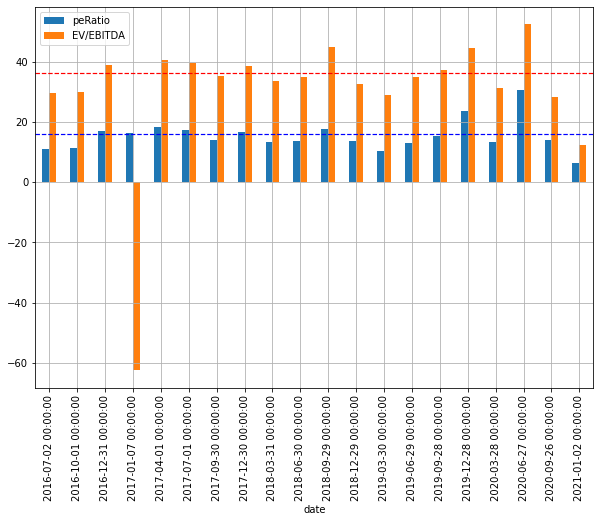

In [32]:
df_stock_metrics[['peRatio', 'EV/EBITDA']][:20].sort_index().plot.bar(grid=True, figsize=(10,7));
plt.axhline(y = quarterly_stat.loc['peRatio']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['EV/EBITDA']['50%'], lw=1.2,ls='--', color='r');

In [33]:
quarterly_stat.loc[['evToSales']]

,count,mean,std,min,25%,50%,75%,max
evToSales,1022.0,5.52906,2.809763,-11.027583,3.686354,5.012212,7.273427,16.323883


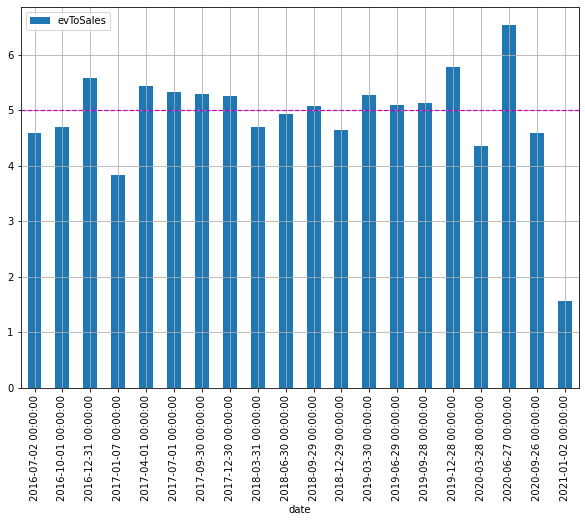

In [34]:
df_stock_metrics['evToSales'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['evToSales']['50%'], lw=1.2,ls='--', color='m');

In [35]:
quarterly_stat.loc[['freeCashFlowYield']]

,count,mean,std,min,25%,50%,75%,max
freeCashFlowYield,1021.0,0.016449,0.123113,-2.340943,0.001571,0.014371,0.030135,1.003922


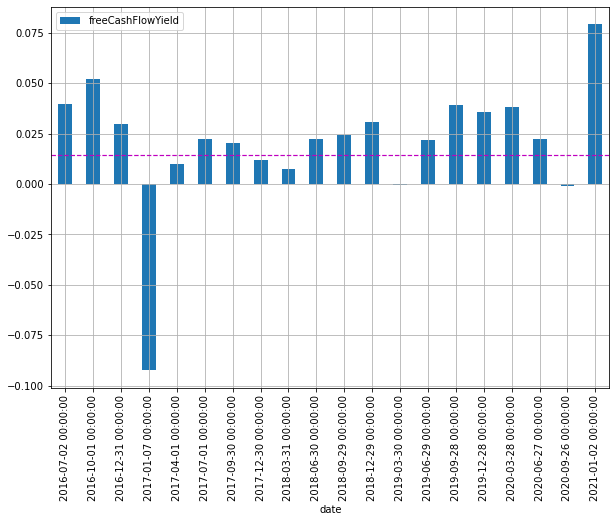

In [36]:
df_stock_metrics['freeCashFlowYield'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['freeCashFlowYield']['50%'], lw=1.2,ls='--', color='m');

In [37]:
quarterly_stat.loc[['roic', 'roe']]

,count,mean,std,min,25%,50%,75%,max
roic,1022.0,0.033115,0.029474,-0.459788,0.021552,0.031236,0.044460,0.116430
roe,1021.0,0.036651,0.143937,-1.653925,0.020464,0.033372,0.052335,2.663717


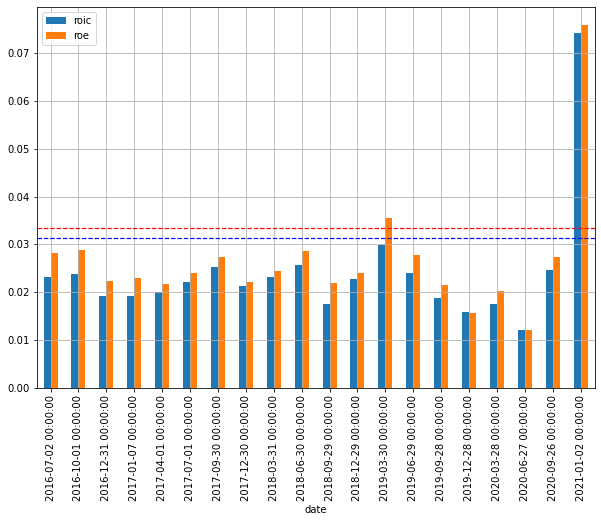

In [38]:
df_stock_metrics[['roic', 'roe']][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['roic']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['roe']['50%'], lw=1.2,ls='--', color='r');

In [39]:
quarterly_stat.loc[['debtToEquity']]

,count,mean,std,min,25%,50%,75%,max
debtToEquity,1021.0,0.886942,4.812494,-51.460076,0.326406,0.581291,1.042342,117.60177


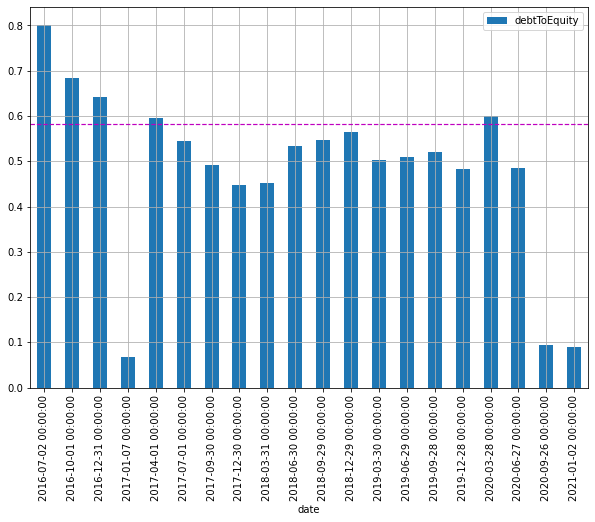

In [40]:
df_stock_metrics['debtToEquity'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['debtToEquity']['50%'], lw=1.2,ls='--', color='m');

### Income Statement

In [41]:
df_income = get_income_statement(ticker_of_interest, 'FY')
df_income.head()

reportedCurrency fillingDate         acceptedDate period  \
symbol date                                                                  
RBC    2021-01-02              USD  2021-03-02  2021-03-02 16:03:40     FY   
       2019-12-28              USD  2020-02-26  2020-02-26 17:17:15     FY   
       2018-12-29              USD  2019-02-26  2019-02-26 17:08:21     FY   
       2017-12-30              USD  2018-02-27  2018-02-27 15:58:41     FY   
       2017-01-07              USD  2017-03-01  2017-03-01 15:37:23     FY   

                      revenue  costOfRevenue  grossProfit  grossProfitRatio  \
symbol date                                                                   
RBC    2021-01-02  2907000000     2098000000    808000000          0.277950   
       2019-12-28  3238000000     2366600000    871400000          0.269117   
       2018-12-29  3645600000     2677800000    967800000          0.265471   
       2017-12-30  3360300000     2464700000    895600000          0.266524   
       2017-01-07  3224000000     2359000000    865000000          0.268300   

                   researchAndDevelopmentExpenses  \
symbol date                                         
RBC    2021-01-02                             0.0   
       2019-12-28                             0.0   
       2018-12-29                             0.0   
       2017-12-30                             0.0   
       2017-01-07                             0.0   

                   generalAndAdministrativeExpenses  ...  \
symbol date                                          ...   
RBC    2021-01-02                               0.0  ...   
       2019-12-28                               0.0  ...   
       2018-12-29                               0.0  ...   
       2017-12-30                               0.0  ...   
       2017-01-07                               0.0  ...   

                   incomeBeforeTaxRatio  incomeTaxExpense  netIncome  \
symbol date                                                            
RBC    2021-01-02              0.085999          56000000  193000000   
       2019-12-28              0.093823          61200000  238900000   
       2018-12-29              0.080151          56400000  231200000   
       2017-12-30              0.082493          59100000  213000000   
       2017-01-07              0.082506          57000000  209000000   

                   netIncomeRatio      eps  epsdiluted  weightedAverageShsOut  \
symbol date                                                                     
RBC    2021-01-02        0.066391  4.82500     4.82500               40000000   
       2019-12-28        0.073780  5.66114     5.66114               42000000   
       2018-12-29        0.063419  5.26651     5.26651               43000000   
       2017-12-30        0.063387  4.74388     4.74388               44000000   
       2017-01-07        0.064826  4.55000     4.55000               44000000   

                   weightedAverageShsOutDil  \
symbol date                                   
RBC    2021-01-02                  40000000   
       2019-12-28                  42000000   
       2018-12-29                  43000000   
       2017-12-30                  44000000   
       2017-01-07                  44000000   

                                                                link  \
symbol date                                                            
RBC    2021-01-02  https://www.sec.gov/Archives/edgar/data/82811/...   
       2019-12-28  https://www.sec.gov/Archives/edgar/data/82811/...   
       2018-12-29  https://www.sec.gov/Archives/edgar/data/82811/...   
       2017-12-30  https://www.sec.gov/Archives/edgar/data/82811/...   
       2017-01-07  https://www.sec.gov/Archives/edgar/data/82811/...   

                                                           finalLink  
symbol date                                                           
RBC    2021-01-02  https://www.sec.gov/Archives/edgar/data/82811/...  
   

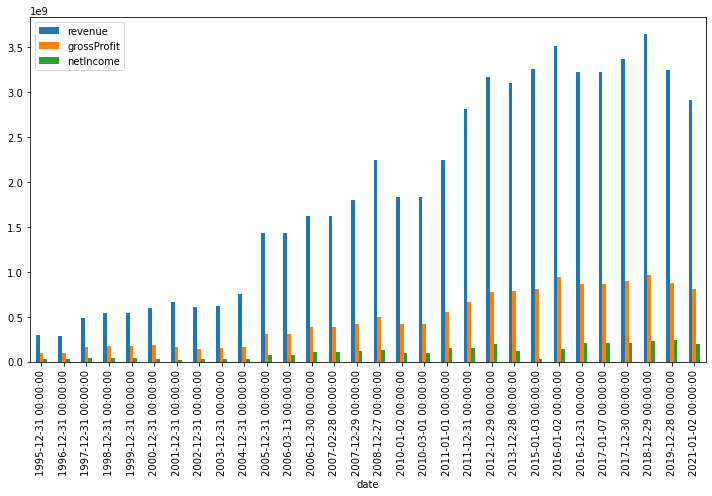

In [42]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

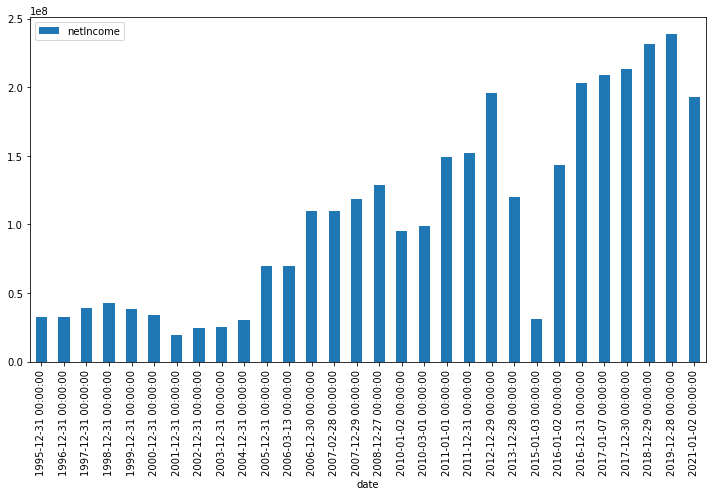

In [43]:
df_income.loc[ticker_of_interest][['netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

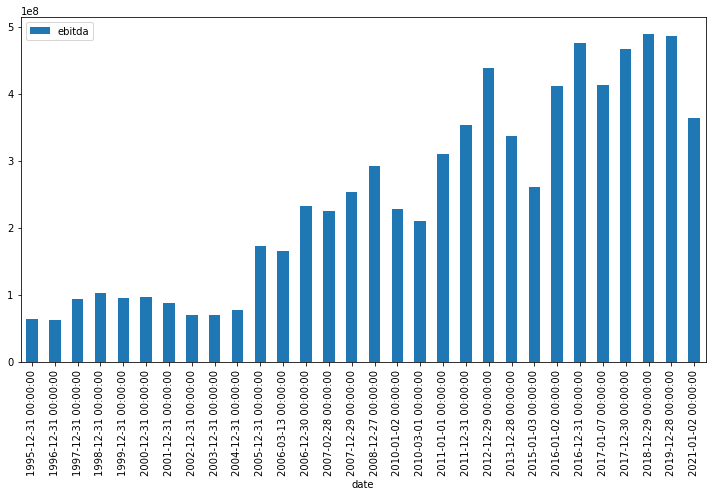

In [44]:
df_income.loc[ticker_of_interest][['ebitda']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

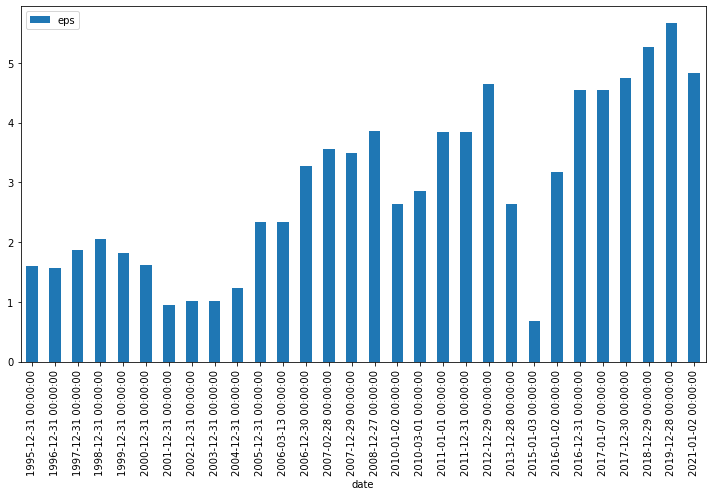

In [45]:
df_income.loc[ticker_of_interest][['eps']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Cashflow Statement

In [46]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, 'FY')
df_cashflow.head()

reportedCurrency fillingDate         acceptedDate period  \
symbol date                                                                  
RBC    2021-01-02              USD  2021-03-02  2021-03-02 16:03:40     FY   
       2019-12-28              USD  2020-02-26  2020-02-26 17:17:15     FY   
       2018-12-29              USD  2019-02-26  2019-02-26 17:08:21     FY   
       2017-12-30              USD  2018-02-27  2018-02-27 15:58:41     FY   
       2017-01-07              USD  2017-03-01  2017-03-01 15:37:23     FY   

                   netIncome  depreciationAndAmortization  deferredIncomeTax  \
symbol date                                                                    
RBC    2021-01-02  193000000                   84000000.0        -16000000.0   
       2019-12-28  238900000                  134500000.0         22400000.0   
       2018-12-29  231200000                  142400000.0         13200000.0   
       2017-12-30  213000000                  137200000.0         -9700000.0   
       2017-01-07  209000000                   93000000.0         -1000000.0   

                   stockBasedCompensation  changeInWorkingCapital  \
symbol date                                                         
RBC    2021-01-02               9000000.0             -18200000.0   
       2019-12-28              13000000.0             -87000000.0   
       2018-12-29              16900000.0             271800000.0   
       2017-12-30              13600000.0              31400000.0   
       2017-01-07              13000000.0                600000.0   

                   accountsReceivables  ...  \
symbol date                             ...   
RBC    2021-01-02           29000000.0  ...   
       2019-12-28           70000000.0  ...   
       2018-12-29          -56000000.0  ...   
       2017-12-30            1000000.0  ...   
       2017-01-07            1000000.0  ...   

                   netCashUsedProvidedByFinancingActivities  \
symbol date                                                   
RBC    2021-01-02                                -147000000   
       2019-12-28                                -397400000   
       2018-12-29                                 -17700000   
       2017-12-30                                -390600000   
       2017-01-07                                -376000000   

                   effectOfForexChangesOnCash  netChangeInCash  \
symbol date                                                      
RBC    2021-01-02                         0.0      279000000.0   
       2019-12-28                  -2600000.0       82800000.0   
       2018-12-29                  -8100000.0      109000000.0   
       2017-12-30                  11600000.0     -144900000.0   
       2017-01-07                         0.0       31000000.0   

                   cashAtEndOfPeriod  cashAtBeginningOfPeriod  \
symbol date                                                     
RBC    2021-01-02        611000000.0              331000000.0   
       2019-12-28        331400000.0              248600000.0   
       2018-12-29        248600000.0              139600000.0   
       2017-12-30        139600000.0              284500000.0   
       2017-01-07        284000000.0              252000000.0   

                   operatingCashFlow  capitalExpenditure  freeCashFlow  \
symbol date                                                              
RBC    2021-01-02          435000000         -47000000.0     388000000   
       2019-12-28          408500000         -92400000.0     316100000   
       2018-12-29          362700000         -77600000.0     285100000   
       2017-12-30          291900000         -65200000.0     226700000   
       2017-01-07          439000000         -65000000.0     374000000   

                                                                link  \
symbol date                                                            
RBC    2021-01-02  https://www.sec.gov/Archives/edgar/data/82811/...   


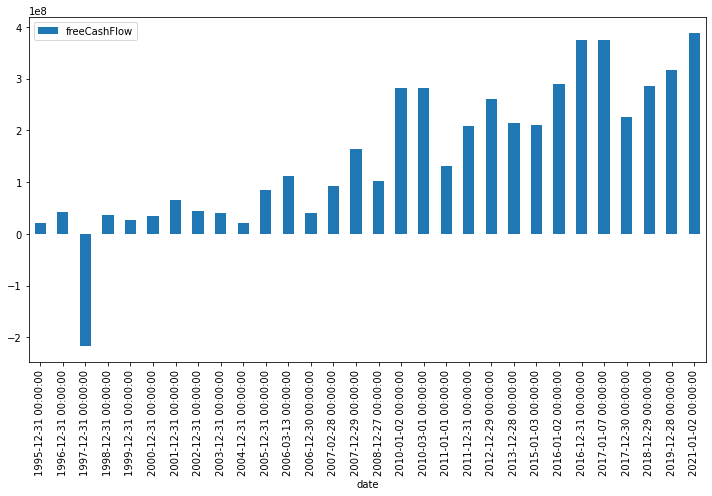

In [47]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Comparison
check for both FY and quarter

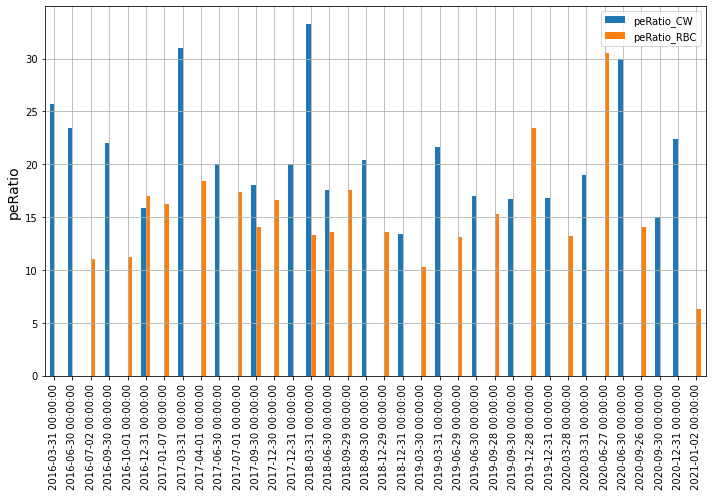

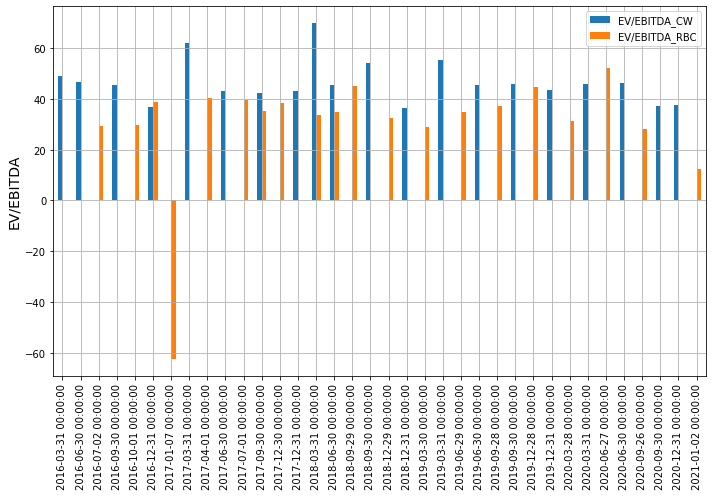

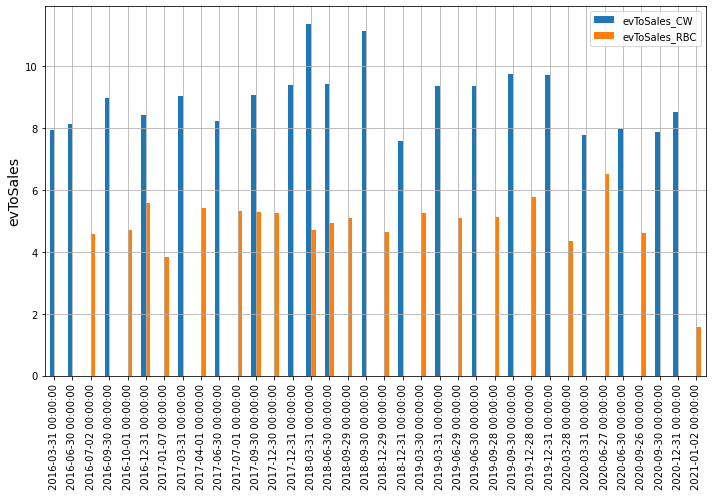

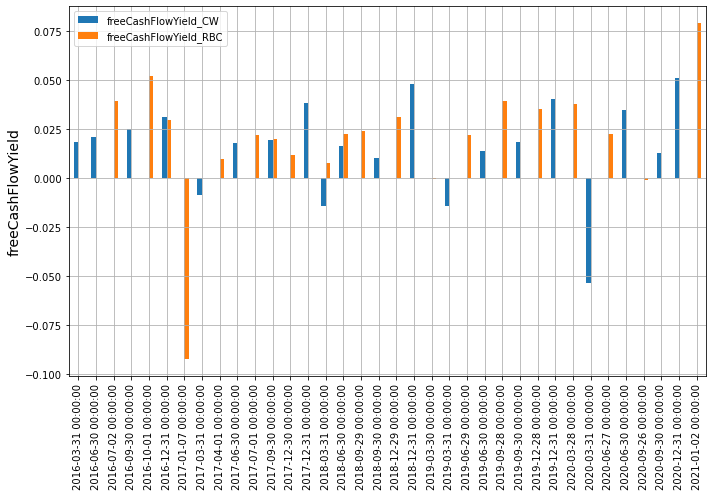

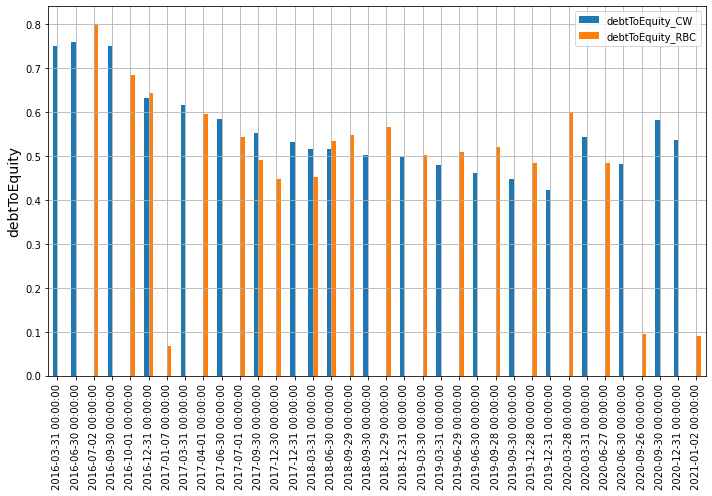

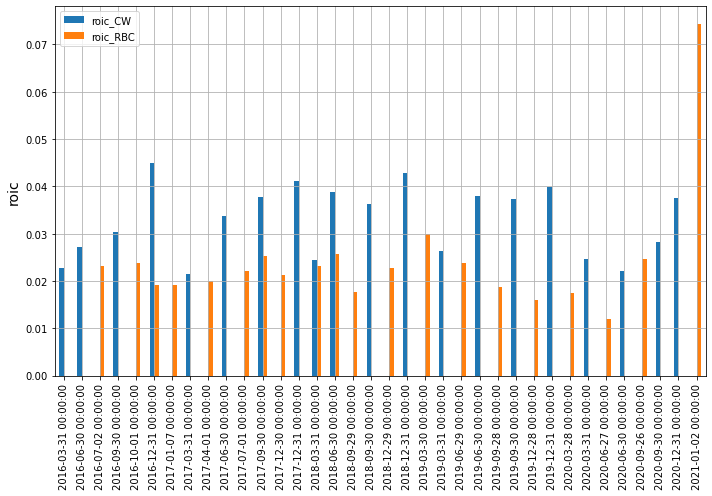

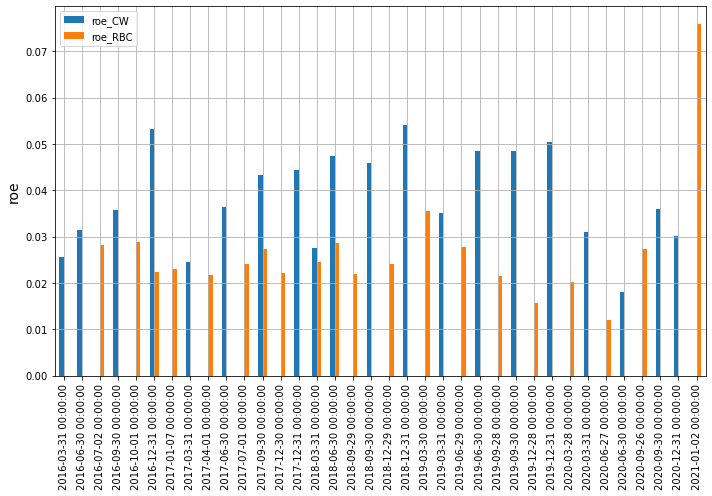

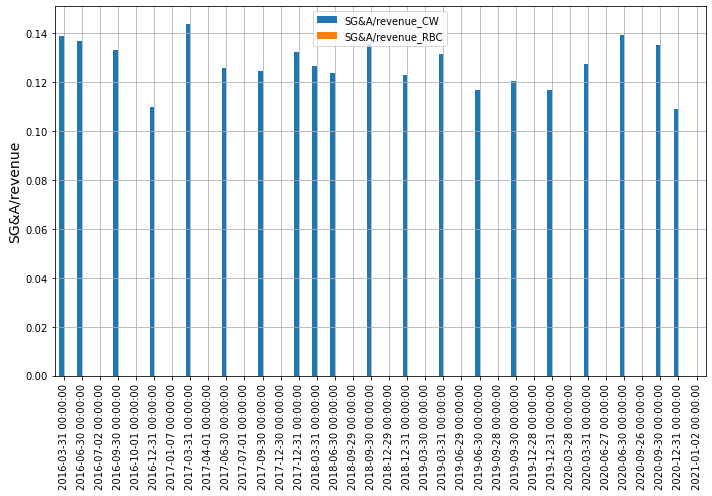

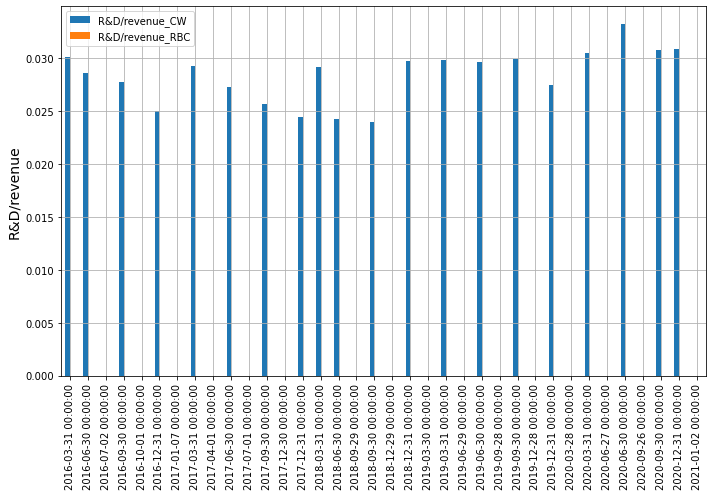

In [48]:
metrics = df_metrics.columns.to_list()

for metric in metrics:
    make_comparison_plot(df_metrics_quarter, 'CW', 'RBC', metric);

In [49]:
earning_calender = get_earnings_calendar()

In [50]:
earning_calender.loc['RBC']

,eps,epsEstimated,time,revenue,revenueEstimated
date,,,,,
2021-05-03,None,1.68,bmo,0,777110000.0
